In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv" , sep = "," , encoding = 'utf-8')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [21]:
df.shape

(1470, 35)

In [22]:
df[df.duplicated()==True] #no duplicates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [26]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [27]:
#data is data frame with label encoded values 
data=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols = ['Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'Over18', 'OverTime']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


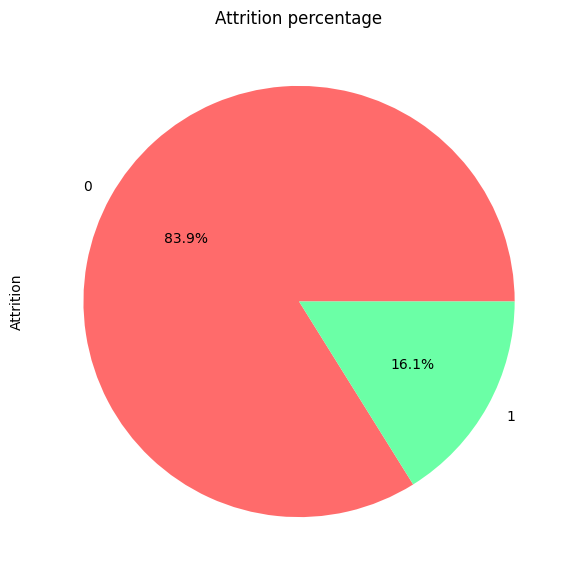

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

# Specify the colors you want to use
colors = ['#FF6B6B', '#6BFFA6']
(data['Attrition'].value_counts()).plot.pie(autopct="%1.1f%%", colors=colors)
plt.title('Attrition percentage')

plt.show()


Text(0.5, 1.0, 'Gender percentage')

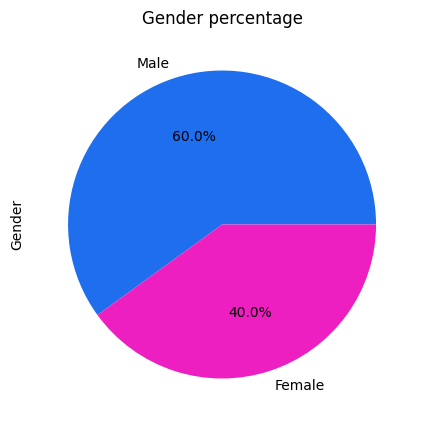

In [29]:
plt.figure(figsize=(5,5,))
(df['Gender'].value_counts()).plot.pie(autopct = "%1.1f%%", colors=['#1f6eed', '#ed1fc0'])
plt.title('Gender percentage')

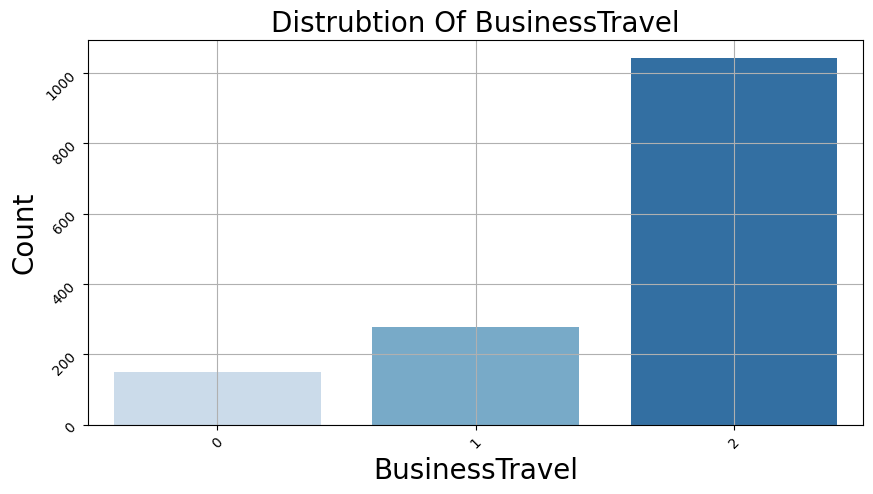

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='BusinessTravel',data=data,palette='Blues')
plt.grid(True)
plt.title('Distrubtion Of BusinessTravel',fontsize=20)
plt.xlabel('BusinessTravel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

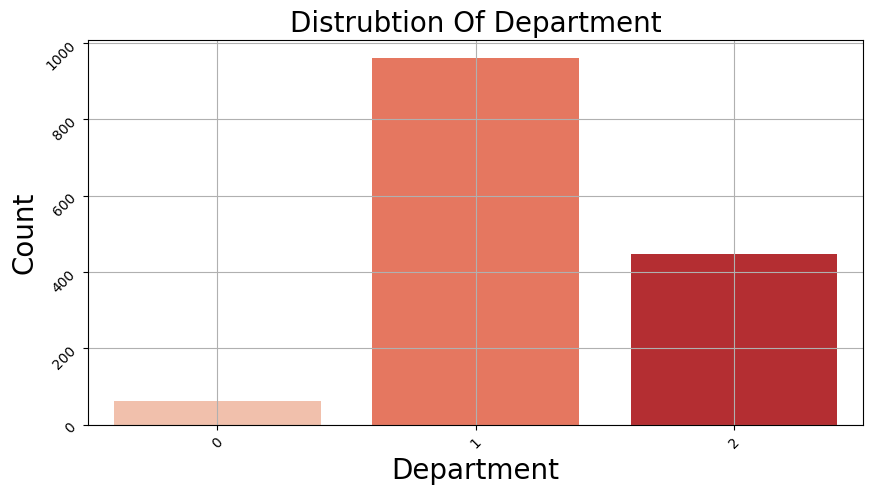

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department',data=data,palette='Reds')
plt.grid(True)
plt.title('Distrubtion Of Department',fontsize=20)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [32]:
pd.crosstab(data.Attrition,data.Department)

Department,0,1,2
Attrition,,,
0,51,828,354
1,12,133,92


In [33]:
Attrition=df[df['Attrition']=="Yes"]
Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [34]:
Attrition.Department.value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [35]:
import plotly.express as px
Department_count = Attrition['Department'].value_counts()
plt.figure(figsize=(10,10))
fig = px.pie(Attrition, values=Department_count, names=Department_count.index)
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=['	#FFB3B3', '	#C1EFFF','#FFDBA4'], line=dict(color='#fafafa', width=2)))

fig.update_traces(hole=0.5, hoverinfo="label+percent+name")
fig.update_layout(annotations=[dict(text='Department', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

In [ ]:
fig = px.ecdf(df, x="MonthlyRate", color="Attrition")
fig.show()


In [ ]:
fig = px.histogram(df, x='OverTime'
            ,color='Attrition', barmode="group")

fig.update_layout(template='plotly_white')
fig.show()

In [ ]:
fig = px.box(df, x="EnvironmentSatisfaction", y='Attrition')
fig.show()

In [ ]:
jobsat= df[(df['JobSatisfaction'] == 2) | (df['JobSatisfaction'] == 3)]
(Attrition['JobSatisfaction'].value_counts()/Attrition.shape[0]*100).plot.bar( color = ["#68228B" , '#79CDCD'  , '#00E5EE', '#FCBAAD'])
plt.title('Attrition job satisfaction')

In [ ]:
fig = px.box(df, x="JobSatisfaction", y='Attrition')
fig.show()

In [ ]:
df['distance']=df["DistanceFromHome"]
df['distance']= np.where(df['distance'] <= 13, 'Near', 'Far')
df

In [ ]:
sns.kdeplot(
   data=df, x="RelationshipSatisfaction", hue="distance",
   fill=True, common_norm=False, palette=['red','black'],
   alpha=.5, linewidth=0,
)

In [ ]:
df.Age.describe()

In [ ]:
sns.stripplot(data=df, y="Age", hue="Gender",
              x="Attrition",alpha=0.3, orient="v")

In [ ]:
g=df[df['Attrition']=='Yes']
g2=df[df['Attrition']=='No']
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.kdeplot(x = g['MonthlyIncome'],
            fill = True, color = "blue", alpha = 0.5, ax=axs[1, 0]). set_xlabel('MonthlyIncome attrition')
sns.kdeplot(x = g2['MonthlyIncome'],
            fill = True, color = "black", alpha = 0.5, ax=axs[1, 1]). set_xlabel('MonthlyIncome stay')
sns.kdeplot(x = df['MonthlyIncome'],
            fill = False, alpha = 0.5, ax=axs[0, 0]). set_xlabel('MonthlyIncome total')
sns.kdeplot(x = df['MonthlyIncome'],hue=df['Attrition'],
            fill = False, alpha = 0.5, ax=axs[0, 1]). set_xlabel('MonthlyIncome hue')

In [ ]:
count_data = df.groupby(['StockOptionLevel', 'Attrition']).size().reset_index(name='Count')
px.line(count_data, x='StockOptionLevel', y='Count', color='Attrition', markers=True)


In [ ]:
data2=data.copy()
label=LabelEncoder()
for x in data2.select_dtypes(include='object').columns:
    data2[x]=label.fit_transform(data2[x])
data2.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
data2.corr()

In [ ]:
X=data2.drop('Attrition',axis=1)
y=data2['Attrition']
key=X.keys()
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

In [ ]:
random=Pipeline([
                    ('min_max',MinMaxScaler()),
                    ('model',RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=10,random_state=44))
                    ])
random.fit(X_train,y_train)

In [ ]:
print('RandomForestClassifierModel Train Score is : ' ,random.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' ,random.score(X_test, y_test))

In [ ]:
svc=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',SVC(kernel= 'rbf',max_iter=100,C=2.0,gamma='auto'))
                    ])
svc.fit(X_train,y_train)

In [ ]:
print('SVCModel Train Score is : ' ,svc.score(X_train, y_train))
print('SVCModel Test Score is : '  , svc.score(X_test, y_test))

# Thank You